# SPACE DATASET

## Content

    The data consists of 10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

## Inspiration

    The dataset offers plenty of information about space to explore. Also the class column is the perfect target for classification practices.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [173]:
df = pd.read_csv('space_dataset.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


    The table results from a query which joins two tables (actuacl views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

## Columns/Features Description:

    1. PhotoObj
    
        - objid = Object Identifier
        - ra = J2000 Right Ascension (r-band)
        - dec = J2000 Declination (r-band)
            Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.
        - u = better of DeV/Exp magnitude fit
        - g = better of DeV/Exp magnitude fit
        - r = better of DeV/Exp magnitude fit
        - i = better of DeV/Exp magnitude fit
        - z = better of DeV/Exp magnitude fit 
            In the Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.
        - run = Run Number
        - rerun = Rerun Number
        - camcol = Camera column
        - field = Field number
            Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:
                * run number, which identifies the specific scan,
                * the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
                * the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
                * An additional number, rerun, specifies how the image was processed

    2. Spec Obj
    
        - specobjid = Object Identifier
        - class = object class (galaxy, star or quasar object)
            The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.
        - redshift = Final Redshift
        - plate = plate number
        - mjd = MJD of observation
        - fiberid = fiber ID
            In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.
            Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS
            Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
            The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID

In [174]:
df.shape

(10000, 18)

In [175]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


    Observations:
        - class column is in object data-type.
        - Rest of the columns are in int and float data-types.

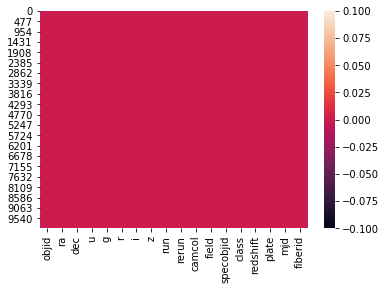

In [177]:
sns.heatmap(df.isnull())
plt.show()

    Observations:
        No missing values in the dataset.

# EDA

## Univariate Analysis

In [178]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

### Observations:
    Type Of Space Object,
        - Star
        - Galaxy
        - Qso - Quasar

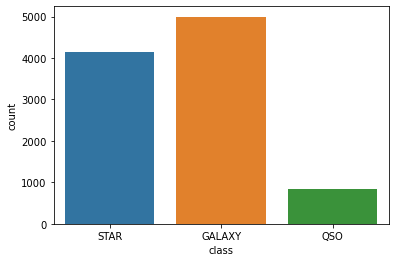

In [179]:
sns.countplot(df['class'])
plt.show()

### Observations:
        SDSS observations were more on Stars and Galaxies.

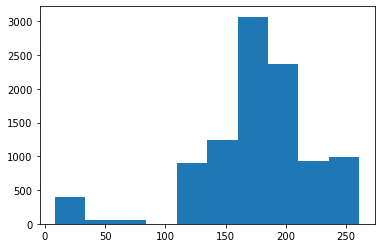

In [180]:
plt.hist(df['ra'])
plt.show()

### Observations:
        Right Ascension (ra) values ranges from 10 to 260.

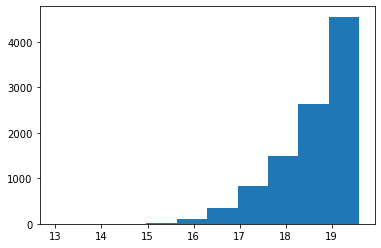

In [181]:
plt.hist(df['u'])
plt.show()

### Observations:
        'u' values ranges from 15 to 20.

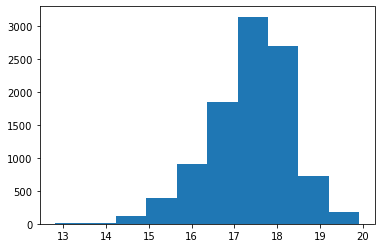

In [182]:
plt.hist(df['g'])
plt.show()

### Observations:
        'g' values ranges from 12.5 to 20.

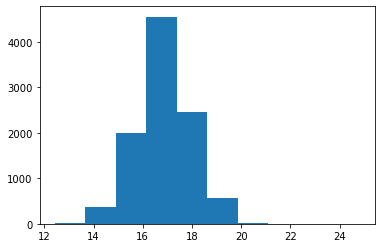

In [183]:
plt.hist(df['r'])
plt.show()

### Observations:
        'r' values ranges from 12 to 21.

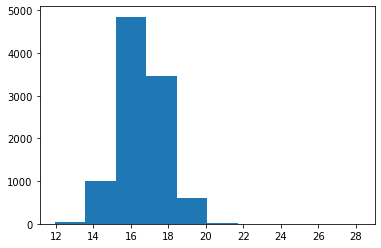

In [184]:
plt.hist(df['i'])
plt.show()

### Observations:
        'i' values ranges from 12 to 22.

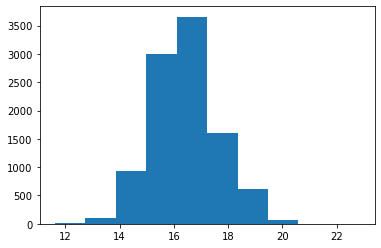

In [185]:
plt.hist(df['z'])
plt.show()

### Observations:
        'z' values ranges from 12 to 20.8.

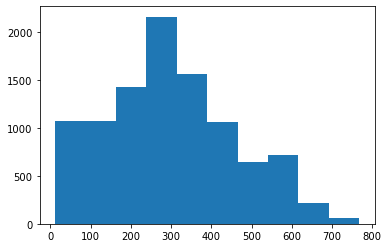

In [186]:
plt.hist(df['field'])
plt.show()

### Observations:
        The field number typically starts at 11 (after an initial ramp up time), and can be as large as 800 for particularly long runs.

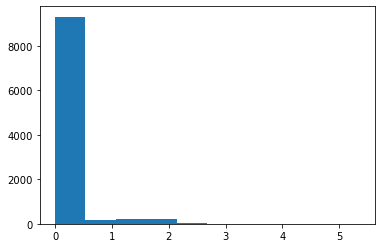

In [187]:
plt.hist(df['redshift'])
plt.show()

### Observations:
        Final 'redshift' values ranges from 0 to 2.5.

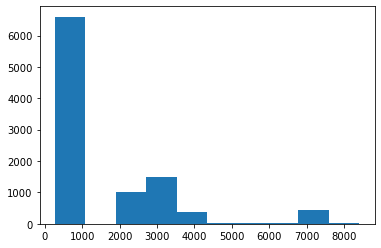

In [188]:
plt.hist(df['plate'])
plt.show()

### Observations:
        Plate number ranges from 100 to 8500.

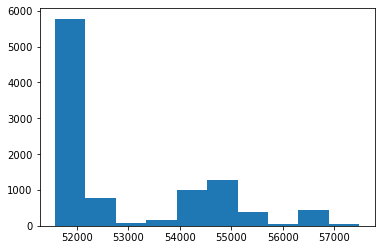

In [189]:
plt.hist(df['mjd'])
plt.show()

### Observations:
        -Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
        - MJD ranges from 51500 to 57500.

## Bivariate Analysis

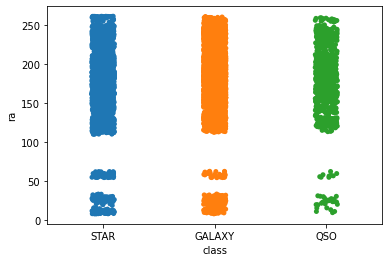

In [190]:
sns.stripplot(df['class'],df['ra'])
plt.show()

### Observations:
        Range of Right Ascension (ra) values for all three Space object are somewhat same.        

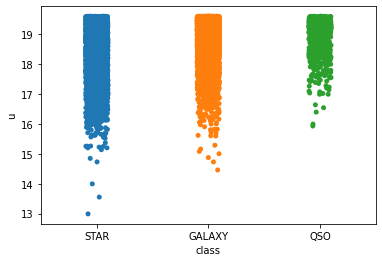

In [191]:
sns.stripplot(df['class'],df['u'])
plt.show()

### Observations:
        - For Star, 'u' values ranges from 13 to 20.
        - For Galaxy, 'u' values ranges from 14 to 20.
        - For Qso, 'u' values ranges from 16 to 20.

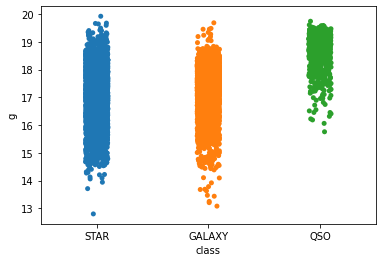

In [192]:
sns.stripplot(df['class'],df['g'])
plt.show()

### Observations:
        - For Star, 'g' values ranges from 13 to 20.
        - For Galaxy, 'g' values ranges from 13 to 20.
        - For Qso, 'g' values ranges from 16 to 20.

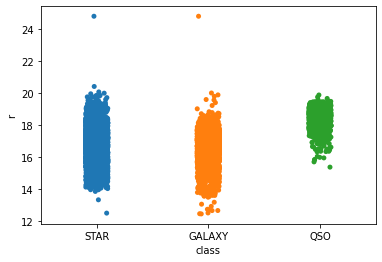

In [193]:
sns.stripplot(df['class'],df['r'])
plt.show()

### Observations:
        - For Star, 'r' values ranges from 12 to 25.
        - For Galaxy, 'r' values ranges from 12 to 25.
        - For Qso, 'r' values ranges from 16 to 20.

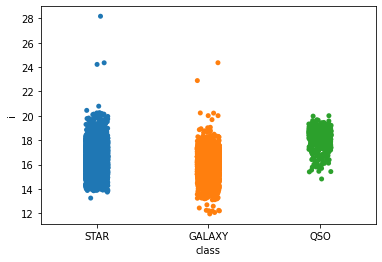

In [194]:
sns.stripplot(df['class'],df['i'])
plt.show()

### Observations:
        - For Star, 'i' values ranges from 14 to 28.
        - For Galaxy, 'i' values ranges from 12 to 24.
        - For Qso, 'i' values ranges from 16 to 20.

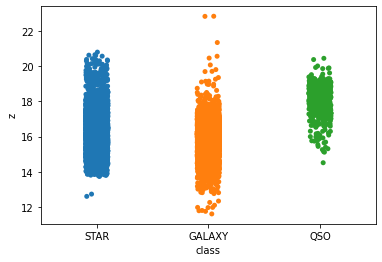

In [195]:
sns.stripplot(df['class'],df['z'])
plt.show()

### Observations:
        - For Star, 'z' values ranges from 13 to 21.
        - For Galaxy, 'z' values ranges from 12 to 23.
        - For Qso, 'z' values ranges from 15 to 21.

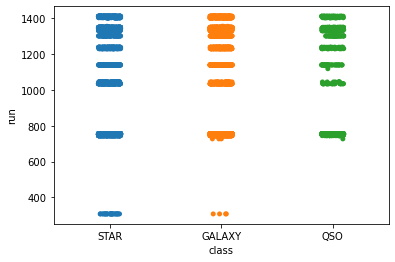

In [196]:
sns.stripplot(df['class'],df['run'])
plt.show()

### Observations:
        - For Star, 'run' number ranges from 300 to 1400.
        - For Galaxy, 'run' number ranges from 300 to 1400.
        - For Qso, 'run' number ranges from 800 to 1400.

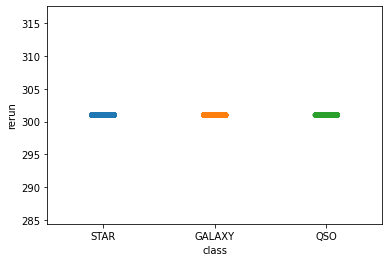

In [197]:
sns.stripplot(df['class'],df['rerun'])
plt.show()

### Observations:
        Rerun number is same for all three Space objects.

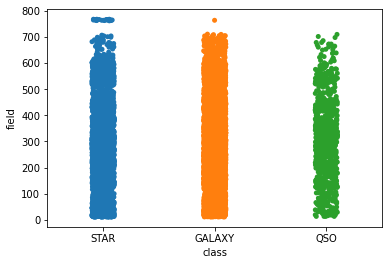

In [198]:
sns.stripplot(df['class'],df['field'])
plt.show()

### Observations:
    The field number typically starts at 11 (after an initial ramp up time), and can be as large as 800 for particularly long runs.
        - For Star, 'field' number ranges from 11 to 780.
        - For Galaxy, 'field' number ranges from 11 to 780.
        - For Qso, 'field' number ranges from 11 to 700.

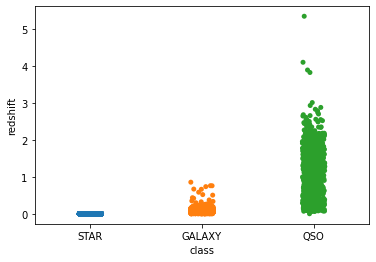

In [199]:
sns.stripplot(df['class'],df['redshift'])
plt.show()

### Observations:
        - For Star, final 'redshift' value is 0.
        - For Galaxy, final 'redshift' values ranges from 0 to 1.
        - For Qso, final 'redshift' values ranges from 0 to 6.

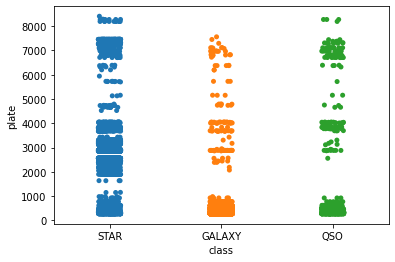

In [200]:
sns.stripplot(df['class'],df['plate'])
plt.show()

### Observations:
        - For Star, 'plate' number ranges from 100 to 9000.
        - For Galaxy, 'plate' number ranges from 100 to 7500.
        - For Qso, 'plate' number ranges from 100 to 8000.

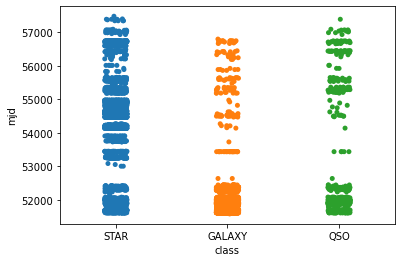

In [201]:
sns.stripplot(df['class'],df['mjd'])
plt.show()

### Observations:
        - Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
        - Depending upon the distance of Stars, Galaxy, Quasar, their MJD would change.

## Label Encoding

In [202]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

## Correlation Matrix

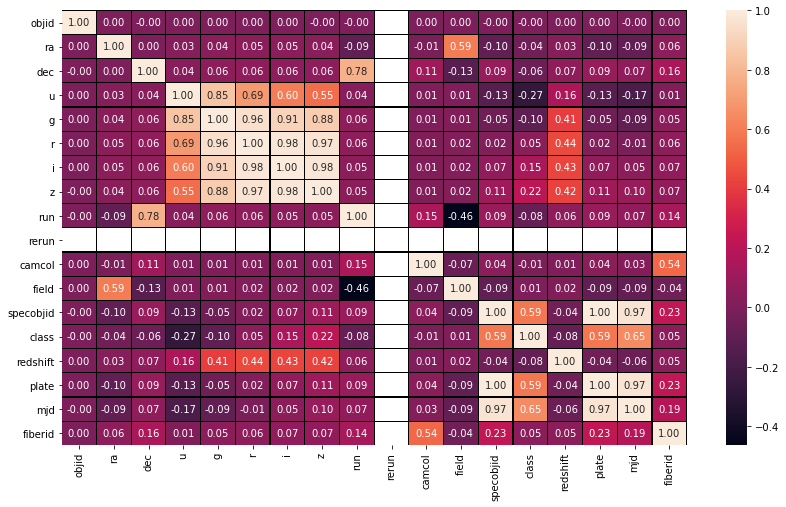

In [203]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=0.2,linecolor='k')
plt.show()

### Observations:
        - Columns such as 'z', 'i', 'r', 'g', 'u' have strong correlation with each other.
        - Columns such as 'z', 'i', 'r', 'g', 'u' have good correlation with 'redshift'column.

## Checking Outliers

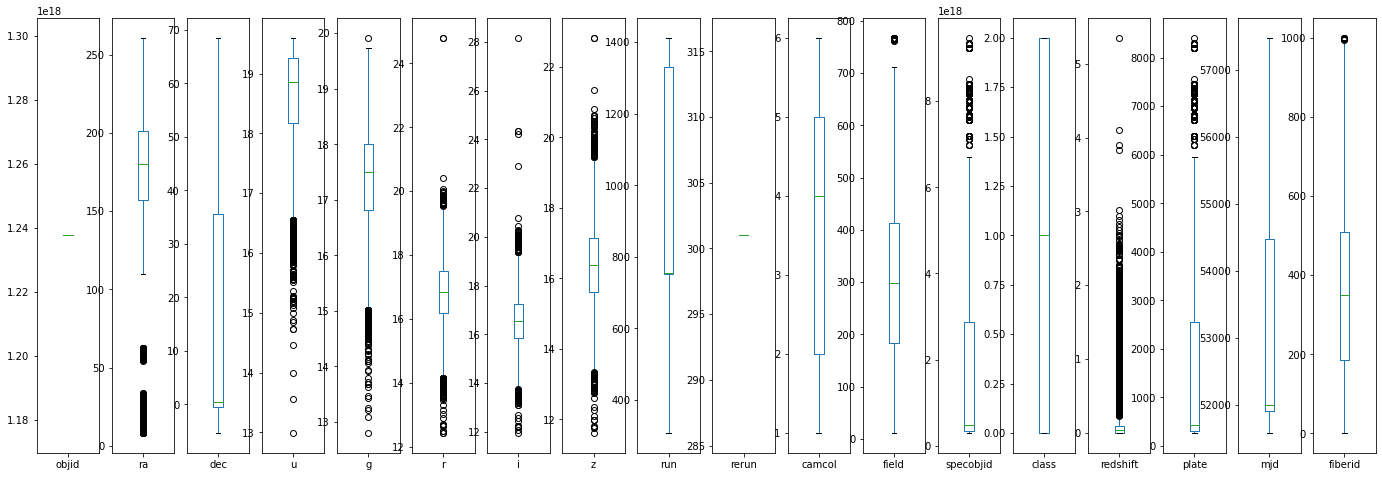

In [204]:
df.plot(kind='box',subplots=True,figsize=(24,8))
plt.show()

### Observations:
        From above box plots it is evident that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [205]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [206]:
np.where(z>3)

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64),
 array([14, 14, 14, ..., 15, 12, 15], dtype=int64))

In [207]:
# Threshold = 3
sd = df[(z<3).all(axis=1)]

In [208]:
print(df.shape)
print(sd.shape)

(10000, 18)
(0, 18)


    Since it removed all data, we are not going with Z-score method of removing outliers.

# Data Preprocessing

## Checking Skewness

In [209]:
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

### Observations:
        Acceptable range of skewness is +\- 0.5, hence data is skewed.

## Splitting Data

In [210]:
x=df.drop('class',axis=1)
y=df['class']

## Removing Skewness

In [211]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing Data

In [212]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [213]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [214]:
# finding the best random_state

acc=0
for i in range(40,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    if mod_acc>acc:
        acc=mod_acc
        best_random_state=i
        
print(f" Best Accuracy score is {acc*100} which is found on random_state {best_random_state}")

 Best Accuracy score is 99.06666666666666 which is found on random_state 767


In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=best_random_state)

In [216]:
# finding the best cv

cv=0
for i in range(2,10):
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_valscore is {cv*100} which is found on random_state {best_cv}")   

 Best Cross_valscore is 98.54995882187724 which is found on random_state 7


# Finding The Best Model

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

In [218]:
mod_list = [DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),
            AdaBoostClassifier(),GradientBoostingClassifier(),SGDClassifier()]

In [219]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('Cross_val_score',cv_score*100)
    print('Difference b\w Accuracy score and Cross_val_score is',(mod_acc*100)-(cv_score*100))
    print('Training score',i.score(x_train,y_train)*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n')

DecisionTreeClassifier()
Accuracy score: 98.93333333333332
Cross_val_score 98.51991881427169
Difference b\w Accuracy score and Cross_val_score is 0.4134145190616323
Training score 100.0
[[1492   13    1]
 [  14  243    1]
 [   3    0 1233]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1506
           1       0.95      0.94      0.95       258
           2       1.00      1.00      1.00      1236

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



KNeighborsClassifier()
Accuracy score: 96.33333333333334
Cross_val_score 95.6598874679333
Difference b\w Accuracy score and Cross_val_score is 0.6734458654000406
Training score 96.92857142857143
[[1461    8   37]
 [  20  237    1]
 [  44    0 1192]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1506
           1     

### Observations:
        From above it is clear that Random Forest Classifier, Gradient Boosting Classifier, Decision Tree Classifier are performing better with Accuracy score of 99%.

### Let's select Random Forest Classifier for Hyper-parameter tuning, because it has higher Accuracy score when compared to other two.

In [220]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
cv_score=cross_val_score(rfc,x,y,cv=best_cv).mean()
print('Cross_val_score',cv_score*100)
print('Difference b\w Accuracy score and Cross_val_score is',(mod_acc*100)-(cv_score*100))
print('Training score',rfc.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 99.06666666666666
Cross_val_score 98.87992285787652
Difference b\w Accuracy score and Cross_val_score is 0.18674380879014052
Training score 100.0
[[1497    5    4]
 [  16  241    1]
 [   2    0 1234]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1506
           1       0.98      0.93      0.96       258
           2       1.00      1.00      1.00      1236

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



## Hyper-parameter Tuning

In [221]:
from sklearn.model_selection import GridSearchCV

parameters={
    'n_estimators':[100,150],
    'criterion':['gini','entropy'],
    'warm_start':[True,False]
}

In [222]:
gscv=GridSearchCV(rfc,parameters,scoring='accuracy',cv=best_cv)
gscv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [223]:
gscv.best_params_

{'criterion': 'gini', 'n_estimators': 150, 'warm_start': True}

In [224]:
rfc=RandomForestClassifier(n_estimators=150,criterion='gini',warm_start=True)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
cv_score=cross_val_score(rfc,x,y,cv=best_cv).mean()
print('Cross_val_score',cv_score*100)
print('Difference b\w Accuracy score and Cross_val_score is',(mod_acc*100)-(cv_score*100))
print('Training score',rfc.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 99.03333333333333
Cross_val_score 98.899916859676
Difference b\w Accuracy score and Cross_val_score is 0.13341647365733422
Training score 100.0
[[1497    6    3]
 [  17  240    1]
 [   2    0 1234]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1506
           1       0.98      0.93      0.95       258
           2       1.00      1.00      1.00      1236

    accuracy                           0.99      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000



# Conclusion

In [225]:
df1 = pd.DataFrame({'Actual Class':y_test,'Predicted_Class':y_pred})
df1

,Actual Class,Predicted_Class
1439,0,0
9571,0,0
3644,0,0
841,2,2
8952,0,0
...,...,...
6608,0,0
2072,2,2
1560,0,0
2741,2,2


### From above table  it is evident that Model(Random Forest Classifier) is performing with 99% Accuracy.

In [226]:
import joblib

In [228]:
# saving the best model for production
joblib.dump(rfc,'Space-Object Model.obj')

['Space-Object Model.obj']